In [2]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
df_google = pd.read_csv('google_books.csv')

# Menampilkan data
print(df_google.head())
print(df_google.info())

                                               title  rating  voters  \
0  Harlequin: Pernikahan Musim Dingin (A Winter W...     0.0       0   
1                                     Dying To Be Me     0.0       0   
2                                       Releases ...     0.0       0   
3                           9 November ( November 9)     0.0       0   
4                     Petualangan Jack & Piggy Natal     0.0       0   

                    timestamp  
0  2024-11-23 16:19:32.414146  
1  2024-11-23 16:19:32.414146  
2  2024-11-23 16:19:32.414146  
3  2024-11-23 16:19:32.414146  
4  2024-11-23 16:19:32.414146  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      520 non-null    object 
 1   rating     520 non-null    float64
 2   voters     520 non-null    int64  
 3   timestamp  520 non-null    object 
dtypes: float64(1), int64(1), o

In [3]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
df_gr = pd.read_csv('goodreads_books.csv')

# Menampilkan data
print(df_gr.head())
print(df_gr.info())

                       title  rating  ratings_count  \
0    Don'T Let The Forest In    4.22           3247   
1              The Blue Hour    3.27           6294   
2               The Bog Wife    3.65           2477   
3  Bloodguard (Old Erth, #1)    3.67           3018   
4         Killer House Party    3.27            357   

                    timestamp  
0  2024-11-23 15:46:51.753419  
1  2024-11-23 15:46:51.753419  
2  2024-11-23 15:46:51.753419  
3  2024-11-23 15:46:51.753419  
4  2024-11-23 15:46:51.753419  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          578 non-null    object 
 1   rating         578 non-null    float64
 2   ratings_count  578 non-null    int64  
 3   timestamp      578 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 18.2+ KB
None


In [4]:
df_google = df_google[['title', 'rating', 'voters']]
df_google = df_google.dropna()
df_google = df_google.drop_duplicates()
df_gr = df_gr[['title', 'rating', 'ratings_count']]
df_gr = df_gr.dropna()
df_gr = df_gr.drop_duplicates()

print(df_google.head())
print(df_google.info())
print(df_gr.head())
print(df_gr.info())

                                               title  rating  voters
0  Harlequin: Pernikahan Musim Dingin (A Winter W...     0.0       0
1                                     Dying To Be Me     0.0       0
2                                       Releases ...     0.0       0
3                           9 November ( November 9)     0.0       0
4                     Petualangan Jack & Piggy Natal     0.0       0
<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   511 non-null    object 
 1   rating  511 non-null    float64
 2   voters  511 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 16.0+ KB
None
                       title  rating  ratings_count
0    Don'T Let The Forest In    4.22           3247
1              The Blue Hour    3.27           6294
2               The Bog Wife    3.65           2477
3  Bloodguard (Old Erth, #

In [5]:
df_gr = df_gr.rename(columns={'ratings_count': 'voters'})
print(df_gr.head())
print(df_gr.info())

                       title  rating  voters
0    Don'T Let The Forest In    4.22    3247
1              The Blue Hour    3.27    6294
2               The Bog Wife    3.65    2477
3  Bloodguard (Old Erth, #1)    3.67    3018
4         Killer House Party    3.27     357
<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 0 to 577
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   486 non-null    object 
 1   rating  486 non-null    float64
 2   voters  486 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.2+ KB
None


In [56]:
# Menggabungkan berdasarkan kolom 'title'
merged_df = pd.merge(df_google, df_gr, on='title', how='outer')

# Menampilkan hasil
print(merged_df.head())
print(merged_df.info())

merged_df.to_csv('merged_data.csv', index=False)

                                         title  rating_x  voters_x  rating_y  \
0       ... History Of Oswego County, New York       0.0       0.0       NaN   
1                   10 Secrets To A Bestseller       5.0       1.0       NaN   
2                    101 Travel Tips & Stories       0.0       0.0       NaN   
3                        1Ast Hair In The Tail       0.0       0.0       NaN   
4  200 Words To Help You Talk About Philosophy       0.0       0.0       NaN   

   voters_y  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     997 non-null    object 
 1   rating_x  511 non-null    float64
 2   voters_x  511 non-null    float64
 3   rating_y  486 non-null    float64
 4   voters_y  486 non-null    float64
dtypes: float64(4), object(1)
memory usage: 39.1+ KB
None


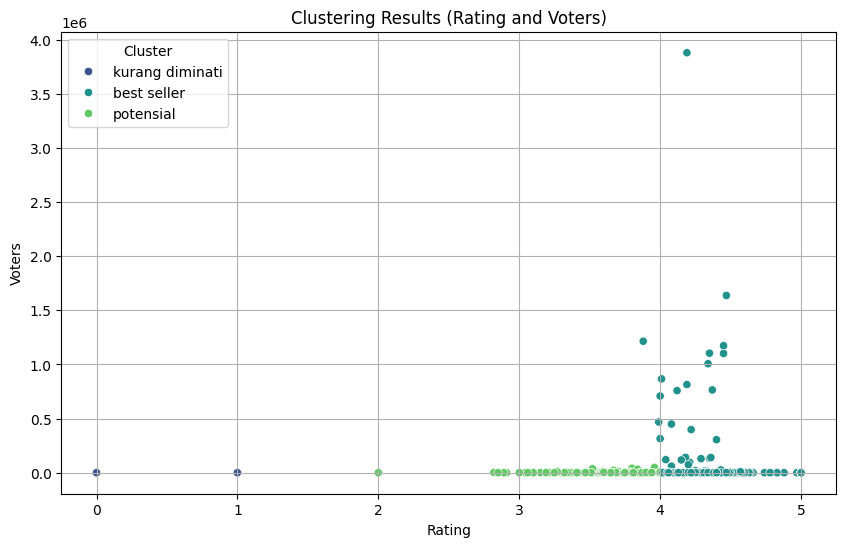

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Combine ratings and voters columns
merged_df['rating'] = merged_df[['rating_x', 'rating_y']].mean(axis=1, skipna=True)
merged_df['voters'] = merged_df[['voters_x', 'voters_y']].mean(axis=1, skipna=True)

# Drop rows with missing values in the combined columns
cleaned_data = merged_df[['title', 'rating', 'voters']].dropna()

# Normalize both rating and voters columns
scaler = MinMaxScaler()
cleaned_data[['rating_scaled', 'voters_scaled']] = scaler.fit_transform(cleaned_data[['rating', 'voters']])

# Use scaled features for clustering
features_for_clustering = cleaned_data[['rating_scaled', 'voters_scaled']]

# Perform clustering with K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_data['cluster'] = kmeans.fit_predict(features_for_clustering)

# Map cluster numbers to categories for better interpretation
cluster_mapping = {0: 'kurang diminati', 1: 'potensial', 2: 'best seller'}
cleaned_data['cluster_category'] = cleaned_data['cluster'].map(cluster_mapping)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned_data,
    x='rating',
    y='voters',
    hue='cluster_category',
    palette='viridis'
)
plt.title('Clustering Results (Rating and Voters)')
plt.xlabel('Rating')
plt.ylabel('Voters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


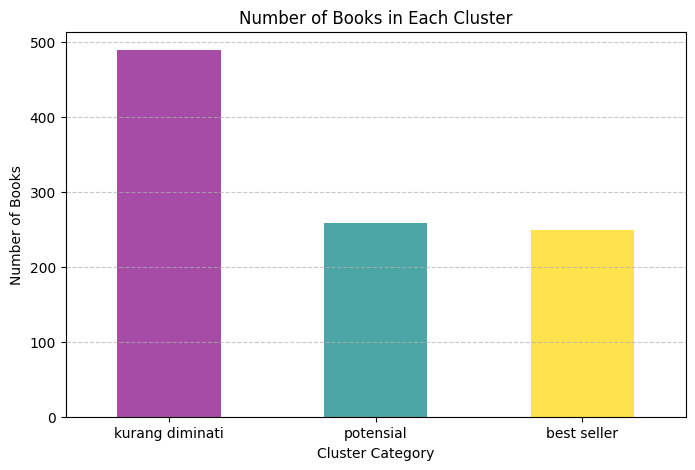

In [58]:
# Create a bar plot to compare the number of books in each cluster
plt.figure(figsize=(8, 5))
cluster_counts = cleaned_data['cluster_category'].value_counts()

cluster_counts.plot(kind='bar', color=['purple', 'teal', 'gold'], alpha=0.7)
plt.title('Number of Books in Each Cluster')
plt.xlabel('Cluster Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

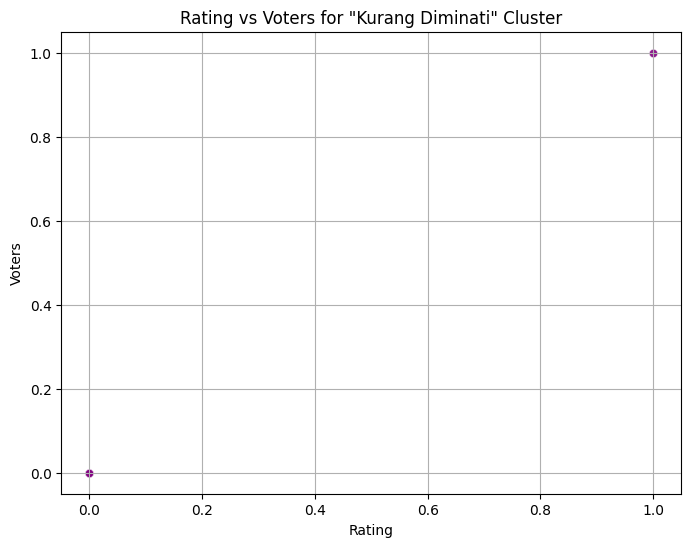

In [59]:
# Filter data for the "kurang diminati" cluster
kurang_diminati_data = cleaned_data[cleaned_data['cluster_category'] == 'kurang diminati']

# Plot rating vs voters for the "kurang diminati" cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=kurang_diminati_data,
    x='rating',
    y='voters',
    color='purple',
    alpha=0.7
)
plt.title('Rating vs Voters for "Kurang Diminati" Cluster')
plt.xlabel('Rating')
plt.ylabel('Voters')
plt.grid(True)
plt.show()

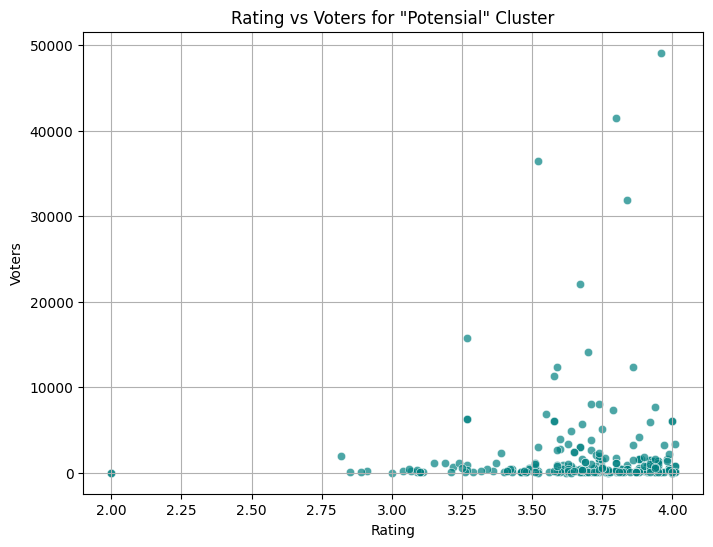

In [60]:
potensial_data = cleaned_data[cleaned_data['cluster_category'] == 'potensial']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=potensial_data,
    x='rating',
    y='voters',
    color='teal',
    alpha=0.7
)
plt.title('Rating vs Voters for "Potensial" Cluster')
plt.xlabel('Rating')
plt.ylabel('Voters')
plt.grid(True)
plt.show()

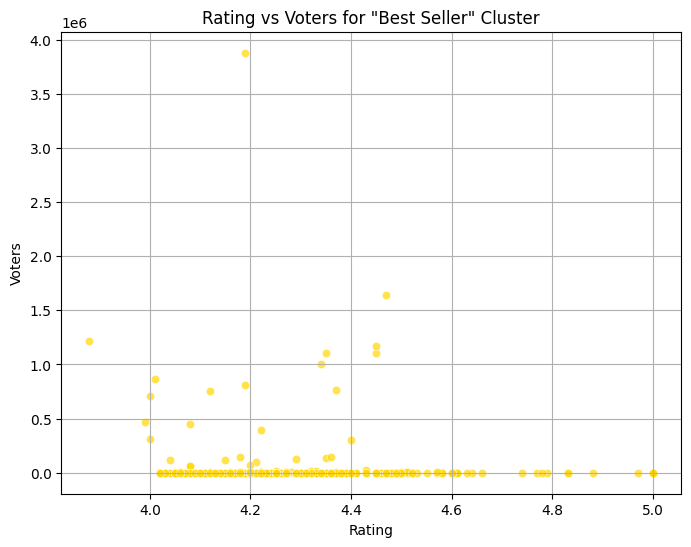

In [62]:
best_seller_data = cleaned_data[cleaned_data['cluster_category'] == 'best seller']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=best_seller_data,
    x='rating',
    y='voters',
    color='gold',
    alpha=0.7
)
plt.title('Rating vs Voters for "Best Seller" Cluster')
plt.xlabel('Rating')
plt.ylabel('Voters')
plt.grid(True)
plt.show()